In [1]:
import os
import string
import argparse 
import pickle 

import numpy as np
import matplotlib.pyplot as plt
from pystruct.datasets import load_letters
from pystruct.models import ChainCRF 
from pystruct.learners import FrankWolfeSSVM

import warnings
warnings.filterwarnings("ignore")

# Level-1


Training the Hidden Markov Model...

Means and variances:

Hidden state 1
Mean = 2.52
Variance = 2.88

Hidden state 2
Mean = 7.54
Variance = 1.35

Hidden state 3
Mean = 2.62
Variance = 2.89


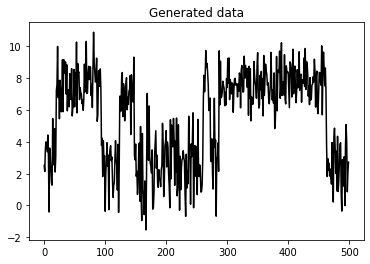

In [11]:
import datetime

import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

# Load input data
data = np.loadtxt('data_1D.txt', delimiter=',')

# Extract the data column (third column) for training 
X = np.column_stack([data[:, 2]])

# Create a Gaussian HMM 
num_components = 3
hmm = GaussianHMM(n_components=num_components, covariance_type='diag', n_iter=1000)

# Train the HMM 
print('\nTraining the Hidden Markov Model...')
hmm.fit(X)

# Print HMM stats
print('\nMeans and variances:')
for i in range(hmm.n_components):
    print('\nHidden state', i+1)
    print('Mean =', round(hmm.means_[i][0], 2))
    print('Variance =', round(np.diag(hmm.covars_[i])[0], 2))

# Generate data using the HMM model
num_samples = 500
generated_data, _ = hmm.sample(num_samples) 
plt.plot(np.arange(num_samples), generated_data[:, 0], c='black')
plt.title('Generated data')

plt.show()

# Level-2

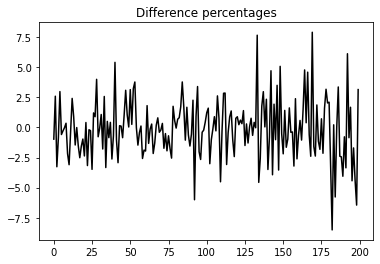

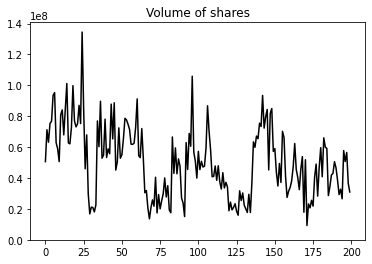

In [2]:
import datetime
import warnings

import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from hmmlearn.hmm import GaussianHMM

# Load historical stock quotes from matplotlib package 
start_date = datetime.date(2000, 1, 1) 
end_date = datetime.date(2022, 1, 1)

intc = yf.Ticker('INTC').history(start=start_date, end=end_date)

# Take the percentage difference of closing stock prices
diff_percentages = 100.0 * np.diff(intc.Close) / intc.Close[:-1]

# Stack the differences and volume values column-wise for training
training_data = np.column_stack([diff_percentages, intc.Volume[:-1]])

# Create and train Gaussian HMM 
hmm = GaussianHMM(n_components=7, covariance_type='diag', n_iter=1000)

hmm.fit(training_data)

# Generate data using the HMM model
num_samples = 200 
samples, _ = hmm.sample(num_samples) 

# Plot the difference percentages 
plt.figure()
plt.title('Difference percentages')
plt.plot(np.arange(num_samples), samples[:, 0], c='black')

# Plot the volume of shares traded
plt.figure()
plt.title('Volume of shares')
plt.plot(np.arange(num_samples), samples[:, 1], c='black')
plt.ylim(ymin=0)

plt.show()

# Level-3

In [4]:
class CRFModel(object):
    def __init__(self, c_val=1.0):
        self.clf = FrankWolfeSSVM(model=ChainCRF(), C=c_val, max_iter=50) 

    # Load the training data
    def load_data(self):
        alphabets = load_letters()
        X = np.array(alphabets['data'])
        y = np.array(alphabets['labels'])
        folds = alphabets['folds']

        return X, y, folds

    # Train the CRF
    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    # Evaluate the accuracy of the CRF
    def evaluate(self, X_test, y_test):
        return self.clf.score(X_test, y_test)

    # Run the CRF on unknown data
    def classify(self, input_data):
        return self.clf.predict(input_data)[0]

# Convert indices to alphabets
def convert_to_letters(indices):
    # Create a numpy array of all alphabets
    alphabets = np.array(list(string.ascii_lowercase))

    # Extract the letters based on input indices
    output = np.take(alphabets, indices)
    output = ''.join(output)

    return output

In [5]:
c_val = 1.0

    # Create the CRF model
crf = CRFModel(c_val)

    # Load the train and test data
X, y, folds = crf.load_data()
X_train, X_test = X[folds == 1], X[folds != 1]
y_train, y_test = y[folds == 1], y[folds != 1]

    # Train the CRF model
print('\nTraining the CRF model...')
crf.train(X_train, y_train)

    # Evaluate the accuracy
score = crf.evaluate(X_test, y_test)
print('\nAccuracy score =', str(round(score*100, 2)) + '%')

indices = range(3000, len(y_test), 200)
for index in indices:
    print("\nOriginal  =", convert_to_letters(y_test[index]))
    predicted = crf.classify([X_test[index]])
    print("Predicted =", convert_to_letters(predicted))


Training the CRF model...

Accuracy score = 77.92%

Original  = rojections
Predicted = rojectiong

Original  = uff
Predicted = ufr

Original  = kiing
Predicted = kiing

Original  = ecompress
Predicted = ecomertig

Original  = uzz
Predicted = uzx

Original  = poiling
Predicted = aniting

Original  = uizzically
Predicted = uzzzically

Original  = omparatively
Predicted = omparatively

Original  = abulously
Predicted = abuloualy

Original  = ormalization
Predicted = ormalisation

Original  = ake
Predicted = aka

Original  = afeteria
Predicted = ateteria

Original  = obble
Predicted = obble

Original  = hadow
Predicted = habow

Original  = ndustrialized
Predicted = ndusqrialyled

Original  = ympathetically
Predicted = ympnshetically
